In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

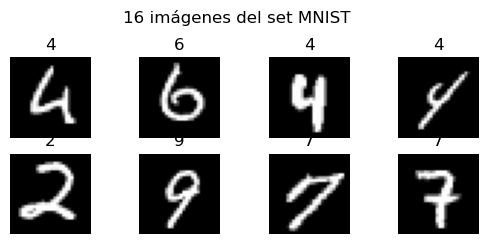

In [3]:
# cargar (descargar si es necesario) el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

ids_imgs = np.random.randint(0, x_train.shape[0], 8)
for i in range(len(ids_imgs)):
    img = x_train[ids_imgs[i], :, :]
    plt.subplot(4, 4, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(y_train[ids_imgs[i]])
plt.suptitle('16 imágenes del set MNIST')
plt.show()


In [2]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# cargar (descargar si es necesario) el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# (60000,28,28)
print('x_shape:', x_train.shape)
# (60000)
print('y_shape:', y_train.shape)

# Preparamaos los datos de los conjunto de entrenamiento y pruebas.
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0  #(se divide por 255 pixeles,para tener numeros entre 0 y 1)
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

# Cambiar a un formato por categorías (10 debido a los números 0, 1, 2..9)
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

print('x_train:', x_train.shape)
print('y_train:', y_train.shape)

x_shape: (60000, 28, 28)
y_shape: (60000,)
x_train: (60000, 784)
y_train: (60000, 10)


In [3]:

# Cree un modelo, ingrese 784 neuronas
model = Sequential([
    Dense(units=784, input_dim=784, bias_initializer='one', activation='relu'),
    Dropout(0.2),  # Agregar dropout al 20% de las neuronas
    Dense(units=10, activation='softmax')
])

# Definir optimizador sgd (stochastic gradient descent),  lr( learning rate) o (tasa de aprendizaje =.02)
adam = Adam(learning_rate=0.001)  # varie este valor

# Definir optimizador, función de pérdida, precisión de cálculo durante el entrenamiento
model.compile(
    optimizer=adam,
    loss='mse',  # funcion de perdida mse(error cuadratico media)
    metrics=['accuracy'],  # metrica, efectividad del modelo
)

In [4]:
# Entrenamiento del modelo con 15 épocas y un tamaño de lote de 150
history = model.fit(x_train, y_train, batch_size=150, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
400/400 [==============================] - 4s 7ms/step - loss: 0.0276 - accuracy: 0.8090 - val_loss: 0.0096 - val_accuracy: 0.9395
Epoch 2/15
400/400 [==============================] - 3s 7ms/step - loss: 0.0089 - accuracy: 0.9435 - val_loss: 0.0070 - val_accuracy: 0.9558
Epoch 3/15
400/400 [==============================] - 3s 7ms/step - loss: 0.0062 - accuracy: 0.9609 - val_loss: 0.0056 - val_accuracy: 0.9642
Epoch 4/15
400/400 [==============================] - 3s 7ms/step - loss: 0.0048 - accuracy: 0.9702 - val_loss: 0.0047 - val_accuracy: 0.9701
Epoch 5/15
400/400 [==============================] - 3s 6ms/step - loss: 0.0039 - accuracy: 0.9762 - val_loss: 0.0042 - val_accuracy: 0.9729
Epoch 6/15
400/400 [==============================] - 3s 6ms/step - loss: 0.0032 - accuracy: 0.9803 - val_loss: 0.0041 - val_accuracy: 0.9737
Epoch 7/15
400/400 [==============================] - 3s 7ms/step - loss: 0.0028 - accuracy: 0.9832 - val_loss: 0.0038 - val_accuracy: 0.9758
Epoch 

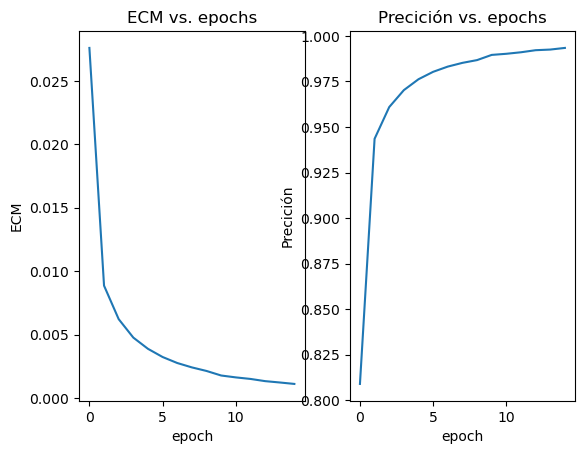

In [5]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('ECM')
plt.title('ECM vs. epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('Precición')
plt.title('Precición vs. epochs')
plt.show()

In [9]:
# Evaluación del modelo con loss y accuracy
loss, accuracy = model.evaluate(x_test, y_test)
print('\ntest loss', loss)
print('accuracy', accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 0.9791

test loss 0.0032322441693395376
accuracy 0.9790999889373779
